In [ ]:
import os
from google.colab import files

# Step 1: Create the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Step 2: Upload the kaggle.json file
uploaded = files.upload()  # Upload your kaggle.json file when prompted

# Step 3: Move the kaggle.json file to the correct location
!mv kaggle.json /root/.kaggle/

# Step 4: Set permissions
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle (1).json


In [ ]:
# Check the uploaded files
import os

# Rename the uploaded file if it was saved as "kaggle (1).json"
if 'kaggle (1).json' in os.listdir():
    os.rename('kaggle (1).json', 'kaggle.json')


In [ ]:
# Move the kaggle.json file to the correct location
!mv kaggle.json /root/.kaggle/

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

Dataset URL: https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis
License(s): other
100% 1.74G/1.74G [01:04<00:00, 37.3MB/s]
100% 1.74G/1.74G [01:04<00:00, 29.1MB/s]


In [ ]:
!unzip chest-xray-pneumoniacovid19tuberculosis.zip -d /content/chest-xray-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0843-0001.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0845-0001.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0846-0001.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0847-0001.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0848-0001.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0849-0001.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0851-0001-0002.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0851-0001.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0852-0001.jpeg  
  inflating: /content/chest-xray-dataset/train/NORMAL/NORMAL2-IM-0853-0001.jpeg  
  inflating: /content/chest-xray-data

In [ ]:
# Step 7: List the files to confirm successful unzipping
!ls /content/chest-xray-dataset

test  train  val


In [ ]:
!pip install numpy matplotlib opencv-python tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Deep Learning Tools
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Suppress warnings
warnings.filterwarnings('ignore')


In [ ]:
# Set paths to your dataset directories
train_path = '/content/chest-xray-dataset/train'
test_path = '/content/chest-xray-dataset/test'
val_path = '/content/chest-xray-dataset/val'


In [ ]:
# Define image dimensions and batch size
w, h = 400, 400
batch_size = 32

# Image data generators
train_img_gen = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.3
)

test_img_gen = ImageDataGenerator(
    rescale=1.0/255
)

val_img_gen = ImageDataGenerator(
    rescale=1.0/255
)

# Flow from directories
X_train = train_img_gen.flow_from_directory(
    train_path,
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

X_test = test_img_gen.flow_from_directory(
    test_path,
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_dataset = val_img_gen.flow_from_directory(
    val_path,
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 6326 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [ ]:
X_train.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

In [ ]:
print(len(X_train))#will tell you how many batches (or groups of 32 images) are in the dataset.


198


In [ ]:

total_images = len(X_train) * batch_size
print(f"Total images: {total_images}")


Total images: 6336


In [ ]:
train_shape=X_train.image_shape
test_shape=X_test.image_shape
print(f'This is the shape of Train Data{train_shape}')
print(f'This is the shape of Test Data{test_shape}')


This is the shape of Train Data(400, 400, 3)
This is the shape of Test Data(400, 400, 3)


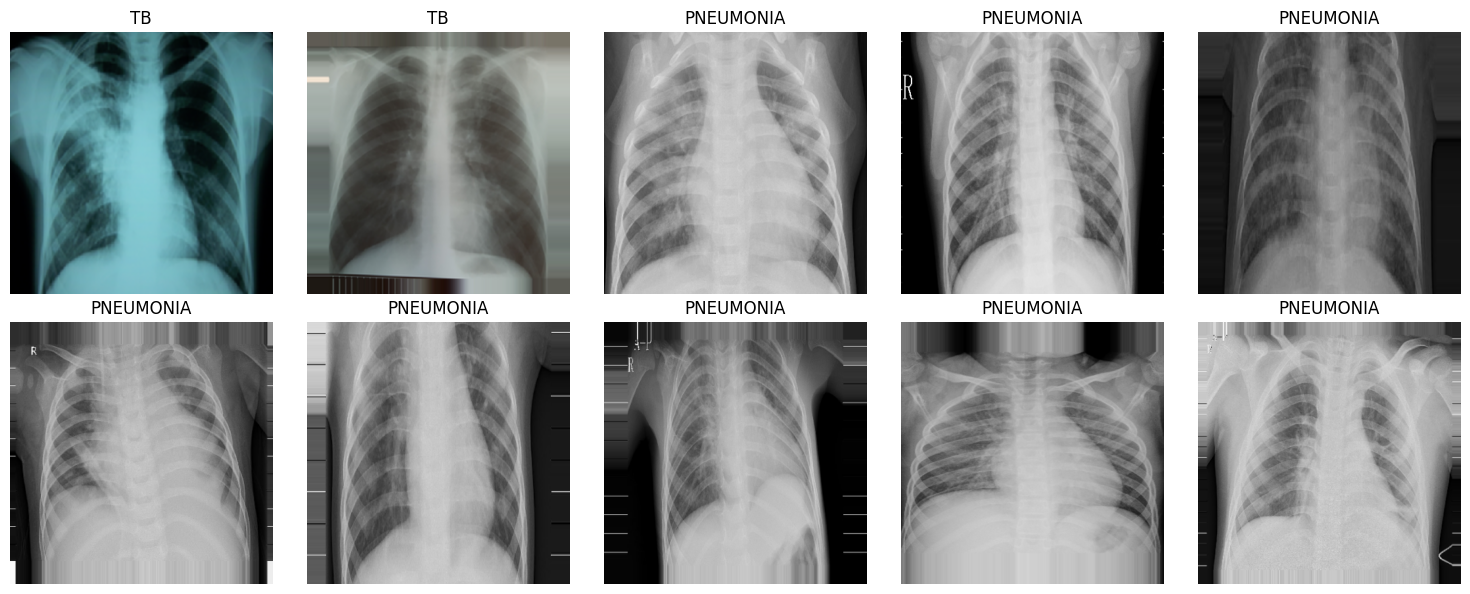

In [ ]:
# Define class labels (same order as in the flow_from_directory method)
classes = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TB']

# Fetch a batch of images and labels from X_train
images, labels = next(X_train)  # Use next() to get the next batch from the training set

# Number of images to display
num_images = 10  # Adjust this number to display more or fewer images
num_columns = 5  # Number of images per row

# Create a subplot grid with rows and columns
fig, axes = plt.subplots(nrows=num_images // num_columns, ncols=num_columns, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each image
for i in range(num_images):
    # Display the image
    axes[i].imshow(images[i])

    # Set the title to the corresponding label
    axes[i].set_title(classes[np.argmax(labels[i])])

    # Turn off the axis for cleaner look
    axes[i].axis('off')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


In [ ]:
# Define your class labels
classes = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TB']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the classes and transform the labels
encoded_labels = label_encoder.fit_transform(classes)

# Display the original class names and their corresponding encoded labels
for class_name, encoded in zip(classes, encoded_labels):
    print(f'Class: {class_name}, Encoded: {encoded}')


Class: COVID19, Encoded: 0
Class: NORMAL, Encoded: 1
Class: PNEUMONIA, Encoded: 2
Class: TB, Encoded: 3


In [ ]:
print(encoded_labels)

[0 1 2 3]


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 3)),  # Input shape adjusted
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  # Flatten the 3D output to 1D
    Dense(1024, activation='relu'),  # Adjust the number of units if necessary
    Dropout(0.2),
    Dense(4, activation='softmax')  # Assuming you have 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
batch_size = batch_size # Adjust based on your batch size
steps_per_epoch = len(X_train) // batch_size
validation_steps = len(val_dataset) // batch_size

history = model.fit(
    X_train,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=val_dataset,
    validation_steps=validation_steps
)


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9097 - loss: 0.2496 - val_accuracy: 0.7368 - val_loss: 0.7892
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8956 - loss: 0.3250 - val_accuracy: 0.7895 - val_loss: 0.6676
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9524 - loss: 0.1832 - val_accuracy: 0.7368 - val_loss: 0.6870
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8981 - loss: 0.3265 - val_accuracy: 0.6316 - val_loss: 0.7974
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8464 - loss: 0.3832 - val_accuracy: 0.7105 - val_loss: 0.5938
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8810 - loss: 0.2617 - val_accuracy: 0.7368 - val_loss: 0.6055
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9278 - loss: 0.2205 - val_accuracy: 0.8158 - val_loss: 0.4934
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8760 - loss: 0.3369 - val_accuracy: 0.7368 - val_loss: 0.7184
Epoch 9/25
6/6 

In [ ]:
# Fit the model using the training data generator
history = model.fit(
    X_train,          # Training data generator
    steps_per_epoch=len(X_train),  # Total number of batches in the training set
    epochs=25,         # Number of epochs to train the model
    validation_data=val_dataset,  # Validation data generator
    validation_steps=len(val_dataset)  # Total number of batches in the validation set
)


Epoch 1/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.8501 - loss: 0.3993 - val_accuracy: 0.7105 - val_loss: 0.6664
Epoch 2/25


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, steps=len(X_test))
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 502ms/step - accuracy: 0.8111 - loss: 0.6020
Test Accuracy: 85.99%


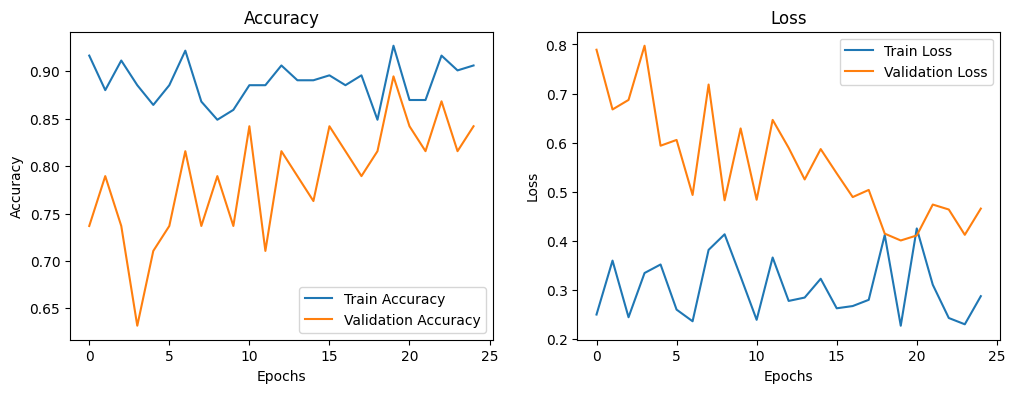

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Found 771 images belonging to 4 classes.
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 396ms/step


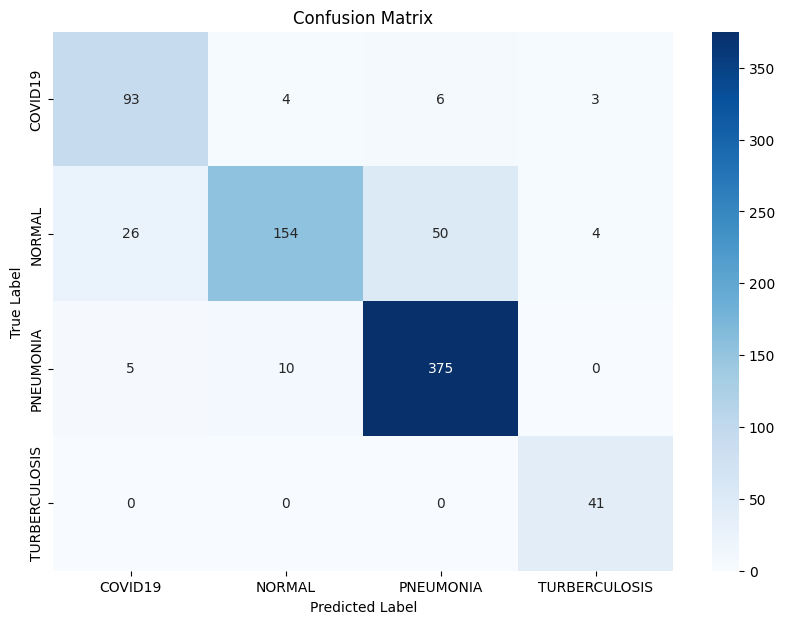

               precision    recall  f1-score   support

      COVID19       0.75      0.88      0.81       106
       NORMAL       0.92      0.66      0.77       234
    PNEUMONIA       0.87      0.96      0.91       390
TURBERCULOSIS       0.85      1.00      0.92        41

     accuracy                           0.86       771
    macro avg       0.85      0.87      0.85       771
 weighted avg       0.87      0.86      0.85       771



In [ ]:
image_size = (400, 400)
# 1. Set up the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    '/content/chest-xray-dataset/test',  # Replace with your test data directory
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class
    shuffle=False
)

# 2. Make predictions
y_pred_prob = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted labels
y_true = test_generator.classes  # True labels

# 3. Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# 5. Classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


In [ ]:
from tensorflow.keras.models import load_model

# Save the model
model.save('ai_lungs_disease.keras')

In [ ]:
import pickle

pickle.dump(label_encoder, open("Label_encoder.pkl",'wb'))
print("saved")

saved


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pickle

# Step 1: Load the trained model
model = load_model('/content/ai_lungs_disease.h5')  # Adjust the path to your model file

# Check the model's input shape
print(f"Model input shape: {model.input_shape}")

# Step 2: Load the LabelEncoder
with open('/content/Label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)


Model input shape: (None, 400, 400, 3)


In [ ]:
print(f"Model input shape: {model.input_shape}")

Model input shape: (None, 400, 400, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


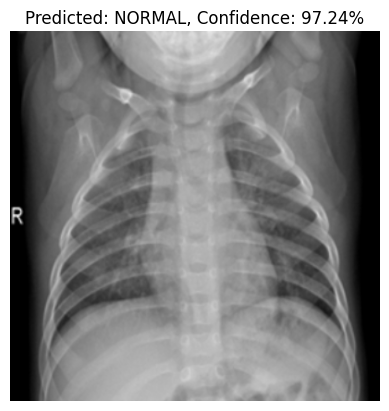

Predicted Label: NORMAL, Confidence Score: 97.24%


In [ ]:
def detection_system(image_path, model, label_encoder, image_size=(400, 400)):  # Change to 400x400
    """
    Detection system function to classify an input image.

    Parameters:
    - image_path: The path to the image to classify.
    - model: The trained Keras model.
    - label_encoder: The LabelEncoder used to encode the labels.
    - image_size: The target size for resizing the image (default: 400x400).

    Returns:
    - predicted_label: The predicted class label.
    - confidence_score: The confidence score of the predicted class.
    """
    # Load the image from the provided path
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    # Convert image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to the same size as the training images
    image_resized = cv2.resize(image_rgb, image_size)

    # Normalize the pixel values to the range [0, 1]
    image_normalized = image_resized / 255.0

    # Expand the dimensions to match the input shape for the model
    image_input = np.expand_dims(image_normalized, axis=0)

    # Predict the class of the image
    predictions = model.predict(image_input)

    # Get the predicted class index and confidence score
    predicted_index = np.argmax(predictions)
    confidence_score = predictions[0][predicted_index]

    # Decode the predicted index back to the original label
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]

    # Display the image with the predicted label and confidence score
    plt.imshow(image_resized)
    plt.title(f"Predicted: {predicted_label}, Confidence: {confidence_score*100:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_label, confidence_score

# Step 4: Example usage
image_path = "/content/Normal-1000.png"  # Replace with your image path
predicted_label, confidence_score = detection_system(image_path, model, label_encoder, image_size=(400, 400))  # Adjust to match model input
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


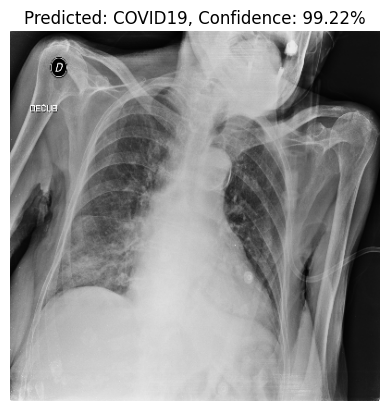

Predicted Label: COVID19, Confidence Score: 99.22%


In [ ]:
image_path = "/content/COVID19(460).jpg"  # Replace with your image path
predicted_label, confidence_score = detection_system(image_path, model, label_encoder, image_size=(400, 400))  # Adjust to match model input
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


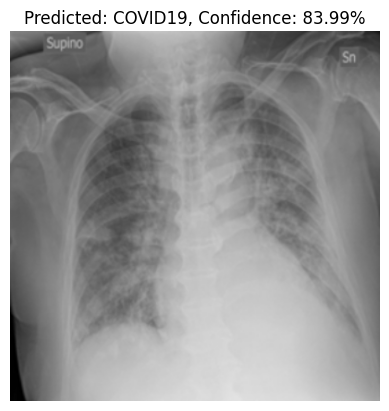

Predicted Label: COVID19, Confidence Score: 83.99%


In [ ]:
image_path = "/content/COVID-10.png"  # Replace with your image path
predicted_label, confidence_score = detection_system(image_path, model, label_encoder, image_size=(400, 400))  # Adjust to match model input
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


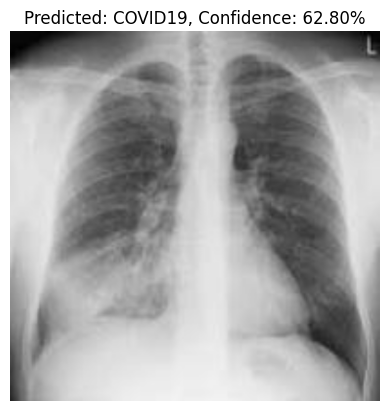

Predicted Label: COVID19, Confidence Score: 62.80%


In [ ]:
image_path = "/content/pnemonia.jpg"  # Replace with your image path
predicted_label, confidence_score = detection_system(image_path, model, label_encoder, image_size=(400, 400))  # Adjust to match model input
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


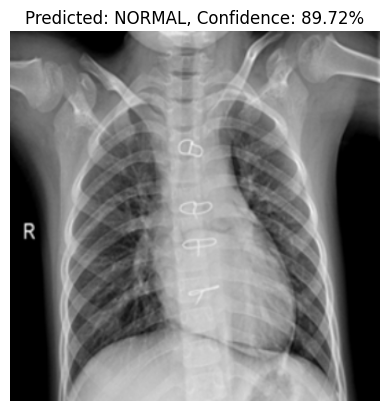

Predicted Label: NORMAL, Confidence Score: 89.72%


In [ ]:
image_path = "/content/Viral Pneumonia-1002.png"  # Replace with your image path
predicted_label, confidence_score = detection_system(image_path, model, label_encoder, image_size=(400, 400))  # Adjust to match model input
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


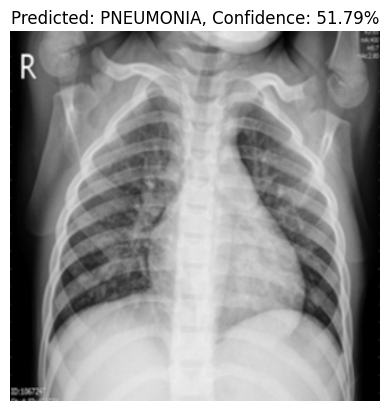

Predicted Label: PNEUMONIA, Confidence Score: 51.79%


In [ ]:
image_path = "/content/Viral Pneumonia-1023.png"  # Replace with your image path
predicted_label, confidence_score = detection_system(image_path, model, label_encoder, image_size=(400, 400))  # Adjust to match model input
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp /content/Label_encoder.pkl /content/drive/MyDrive/


In [ ]:
!cp /content/ai_lungs_disease.keras /content/drive/MyDrive/


In [ ]:
model

<Sequential name=sequential, built=True>